In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
yield_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield.csv")
temp_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\temp.csv")
rainfall_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\rainfall.csv")
pesticides_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\pesticides.csv")
yield_df = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield_df.csv")

In [3]:
yield_data.head(7)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144


In [4]:
needed = ['Area','Item','Year','Value']
yield_data = yield_data[needed]

In [5]:
temp_data.head(7)

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN


In [6]:
temp_data.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_data.head(7)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN


In [7]:
rainfall_data.head(7)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327


In [8]:
pesticides_data.head(7)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96


In [9]:
needed = ['Area','Year','Value']
pesticides_data = pesticides_data[needed]

In [10]:
print("pesticides -- > ",pesticides_data.shape)
print("rainfall -- > ",rainfall_data.shape)
print("temp -- > ",temp_data.shape)
print("yield -- > ",yield_data.shape)

pesticides -- >  (4349, 3)
rainfall -- >  (6727, 3)
temp -- >  (71311, 3)
yield -- >  (56717, 4)


In [11]:
temp_data= temp_data[temp_data.Year >= 1961]
yield_final = pd.merge(yield_data,temp_data,on=['Year','Area'])
yield_final = pd.merge(yield_final,pesticides_data,on=['Year','Area'])
yield_final.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace = True)
yield_final = pd.merge(yield_final,rainfall_data,on=['Year','Area'])
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

In [12]:
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

In [13]:
print (yield_final.shape)

(28248, 7)


In [14]:
yield_final.head(7)

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485.0
1,Albania,Potatoes,1990,66667,16.37,121.0,1485.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485.0
3,Albania,Sorghum,1990,12500,16.37,121.0,1485.0
4,Albania,Soybeans,1990,7000,16.37,121.0,1485.0
5,Albania,Wheat,1990,30197,16.37,121.0,1485.0
6,Albania,Maize,1991,29068,15.36,121.0,1485.0


In [15]:
import pandas as pd

nan_values = yield_final[yield_final.isna().any(axis=1)]


numeric_columns = yield_final.select_dtypes(include=['number']).columns
other_values = yield_final[(yield_final[numeric_columns] > 100).any(axis=1)]

print("NaN values:")
print(nan_values)

print("\nOther values (greater than 100):")
print(other_values)


NaN values:
         Area            Item  Year  Yield_Value  avg_temp  Pesticides_Value   
1986  Bahamas         Cassava  1990       106667     25.74            484.59  \
1987  Bahamas           Maize  1990        15000     25.74            484.59   
1988  Bahamas  Sweet potatoes  1990        38118     25.74            484.59   
1989  Bahamas         Cassava  1991       100000     25.66            484.59   
1990  Bahamas           Maize  1991        16667     25.66            484.59   
1991  Bahamas  Sweet potatoes  1991        31385     25.66            484.59   

      average_rain  
1986           NaN  
1987           NaN  
1988           NaN  
1989           NaN  
1990           NaN  
1991           NaN  

Other values (greater than 100):
           Area            Item  Year  Yield_Value  avg_temp   
0       Albania           Maize  1990        36613     16.37  \
1       Albania        Potatoes  1990        66667     16.37   
2       Albania     Rice, paddy  1990        23333    

In [16]:
import pandas as pd
import numpy as np

yield_final_numeric = pd.get_dummies(yield_final)

for column in yield_final_numeric.select_dtypes(include=[np.number]).columns:
    mean = yield_final_numeric[column].mean()
    std = yield_final_numeric[column].std()
    nan_count = yield_final_numeric[column].isna().sum()
    if nan_count > 0:
        fill_values = np.random.normal(loc=mean, scale=std, size=nan_count)
        yield_final_numeric[column][np.isnan(yield_final_numeric[column])] = fill_values

if yield_final_numeric.isna().sum().sum() == 0:
    print("All NaN values have been handled successfully.")
else:
    print("There are still NaN values remaining in the dataset.")


All NaN values have been handled successfully.


C:\Users\nossa\AppData\Local\Temp\ipykernel_21824\3485125272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_final_numeric[column][np.isnan(yield_final_numeric[column])] = fill_values


In [17]:
yield_final_numeric

,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,16.37,121.00,1485.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,66667,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,23333,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,12500,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,7000,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,2013,22581,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28244,2013,3066,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28245,2013,13142,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28246,2013,22222,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
import pandas as pd

nan_values_numeric = yield_final_numeric[yield_final_numeric.isna().any(axis=1)]

numeric_columns = yield_final_numeric.select_dtypes(include=['number']).columns
other_values_numeric = yield_final_numeric[(yield_final_numeric[numeric_columns] > 100).any(axis=1)]

print("NaN values:")
print(nan_values_numeric)

print("\nOther values (greater than 100):")
print(other_values_numeric)


NaN values:
Empty DataFrame
Columns: [Year, Yield_Value, avg_temp, Pesticides_Value, average_rain, Area_Albania, Area_Algeria, Area_Angola, Area_Argentina, Area_Armenia, Area_Australia, Area_Austria, Area_Azerbaijan, Area_Bahamas, Area_Bahrain, Area_Bangladesh, Area_Belarus, Area_Belgium, Area_Botswana, Area_Brazil, Area_Bulgaria, Area_Burkina Faso, Area_Burundi, Area_Cameroon, Area_Canada, Area_Central African Republic, Area_Chile, Area_Colombia, Area_Croatia, Area_Denmark, Area_Dominican Republic, Area_Ecuador, Area_Egypt, Area_El Salvador, Area_Eritrea, Area_Estonia, Area_Finland, Area_France, Area_Germany, Area_Ghana, Area_Greece, Area_Guatemala, Area_Guinea, Area_Guyana, Area_Haiti, Area_Honduras, Area_Hungary, Area_India, Area_Indonesia, Area_Iraq, Area_Ireland, Area_Italy, Area_Jamaica, Area_Japan, Area_Kazakhstan, Area_Kenya, Area_Latvia, Area_Lebanon, Area_Lesotho, Area_Libya, Area_Lithuania, Area_Madagascar, Area_Malawi, Area_Malaysia, Area_Mali, Area_Mauritania, Area_Mauriti

In [19]:
from scipy import stats

numerical_columns = yield_final_numeric.select_dtypes(include=['number']).columns
z_scores = stats.zscore(yield_final_numeric[numerical_columns])

threshold = 3
 
outliers_indices = (np.abs(z_scores) > threshold).any(axis=1)

yield_final_no_outliers = yield_final_numeric[~outliers_indices]

print(yield_final_no_outliers)


       Year  Yield_Value  avg_temp  Pesticides_Value  average_rain   
0      1990        36613     16.37            121.00        1485.0  \
1      1990        66667     16.37            121.00        1485.0   
2      1990        23333     16.37            121.00        1485.0   
3      1990        12500     16.37            121.00        1485.0   
4      1990         7000     16.37            121.00        1485.0   
...     ...          ...       ...               ...           ...   
28243  2013        22581     19.76           2550.07         657.0   
28244  2013         3066     19.76           2550.07         657.0   
28245  2013        13142     19.76           2550.07         657.0   
28246  2013        22222     19.76           2550.07         657.0   
28247  2013        22888     19.76           2550.07         657.0   

       Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia   
0              True         False        False           False         False  \

**A1**

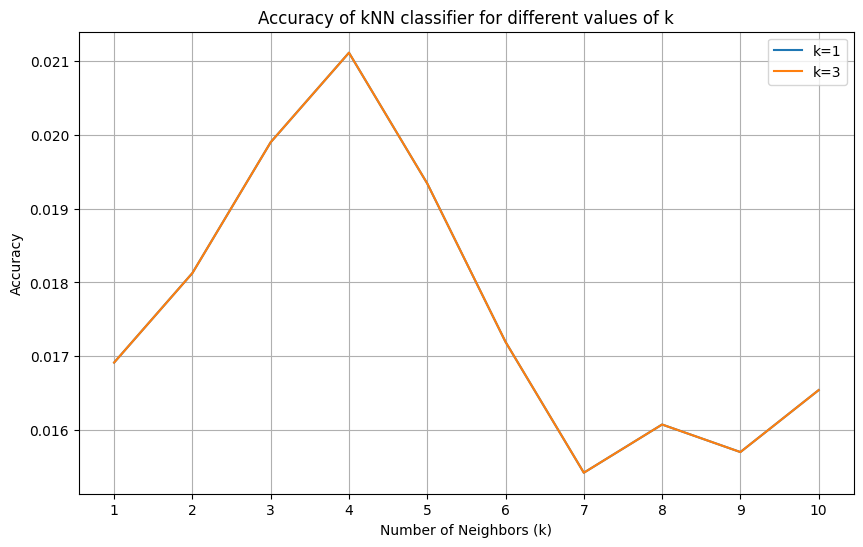

C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scores for k=3:
Confusion Matrix for Training Data:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Confusion Matrix for Test Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Precision (Training): 0.10815378659485592
Precision (Test): 0.01019495363413748

Recall (Training): 0.22796087471185597
Recall (Test): 0.01990282190244814

F1-Score (Training): 0.13202992375547418
F1-Score (Test): 0.011986765784097398


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Extract features and target variable
X = yield_final_no_outliers[['avg_temp', 'Pesticides_Value']]
y = yield_final_no_outliers['Yield_Value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Defining the range of k values
k_values = range(1, 11) 

# Initializing the lists to store accuracy for k=1 and k=3
accuracy_k1 = []
accuracy_k3 = []

# Iterating over each value of k
for k in k_values:
    # Initialize and train kNN classifier with k=1
    neigh_k1 = KNeighborsClassifier(n_neighbors=k)
    neigh_k1.fit(X_train, y_train)
    accuracy_k1.append(neigh_k1.score(X_test, y_test))

    # Initialize and train kNN classifier with k=3
    neigh_k3 = KNeighborsClassifier(n_neighbors=k)
    neigh_k3.fit(X_train, y_train)
    accuracy_k3.append(neigh_k3.score(X_test, y_test))

# Plotting the accuracies for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_k1, label='k=1')
plt.plot(k_values, accuracy_k3, label='k=3')
plt.title('Accuracy of kNN classifier for different values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Define function to evaluate model performance and return metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, average='weighted'):
    # Make predictions on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    train_confusion = confusion_matrix(y_train, y_train_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)
    
    # Calculate precision, recall, and F1-score
    train_precision = precision_score(y_train, y_train_pred, average=average)
    test_precision = precision_score(y_test, y_test_pred, average=average)
    
    train_recall = recall_score(y_train, y_train_pred, average=average)
    test_recall = recall_score(y_test, y_test_pred, average=average)
    
    train_f1 = f1_score(y_train, y_train_pred, average=average)
    test_f1 = f1_score(y_test, y_test_pred, average=average)
    
    # Return confusion matrices and performance metrics
    return train_confusion, test_confusion, train_precision, test_precision, \
           train_recall, test_recall, train_f1, test_f1

# Initialize and train kNN classifier with k=3
neigh_k3 = KNeighborsClassifier(n_neighbors=3)
neigh_k3.fit(X_train, y_train)

# Evaluate model for k=3
train_confusion_k3, test_confusion_k3, train_precision_k3, test_precision_k3, \
train_recall_k3, test_recall_k3, train_f1_k3, test_f1_k3 = evaluate_model(neigh_k3, X_train, y_train, X_test, y_test)

# Print scores for k=3
print("Scores for k=3:")
print("Confusion Matrix for Training Data:")
print(train_confusion_k3)
print("\nConfusion Matrix for Test Data:")
print(test_confusion_k3)
print("\nPrecision (Training):", train_precision_k3)
print("Precision (Test):", test_precision_k3)
print("\nRecall (Training):", train_recall_k3)
print("Recall (Test):", test_recall_k3)
print("\nF1-Score (Training):", train_f1_k3)
print("F1-Score (Test):", test_f1_k3)


**A2**

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Define the data
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Separate the data into matrices A and C
A = data[:, :-1] 
C = data[:, -1] 

# Calculate the model vector X using pseudo-inverse
pseudoinv = np.linalg.pinv(A)
X = np.dot(pseudoinv, C)

# Calculate the predicted prices using the model vector X
productcosts = np.dot(A, X)

# Calculate performance metrics
mse = mean_squared_error(C, productcosts)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(C, productcosts)
r2 = r2_score(C, productcosts)

# Print performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1.21370983433684e-26
Root Mean Squared Error (RMSE): 1.1016849977815073e-13
Mean Absolute Percentage Error (MAPE): 4.886671251727253e-16
R-squared (R2) Score: 1.0


**A3**

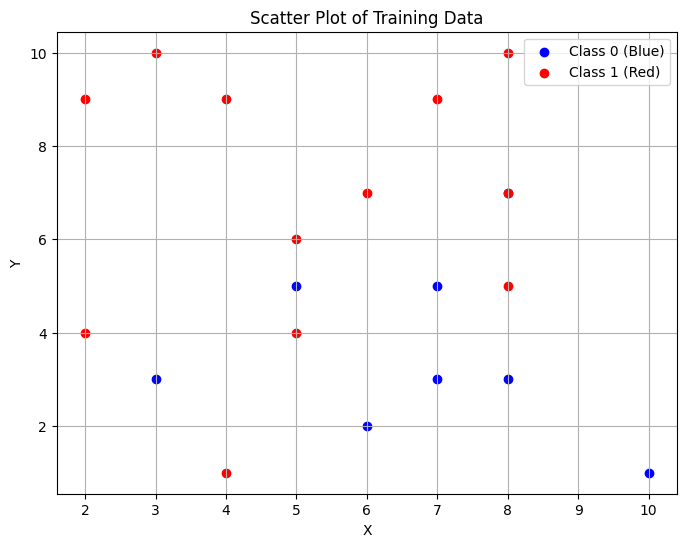

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random values for X and Y features
np.random.seed(42)  # for reproducibility
X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)

# Assigning the data points to two different classes that is class 0 - Blue and class 1 - Red
classes = np.random.randint(0, 2, 20)

# Creating the scatter plot of the training data and color the points based on their class
plt.figure(figsize=(8, 6))
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')
plt.title('Scatter Plot of Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()



**A4**

C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


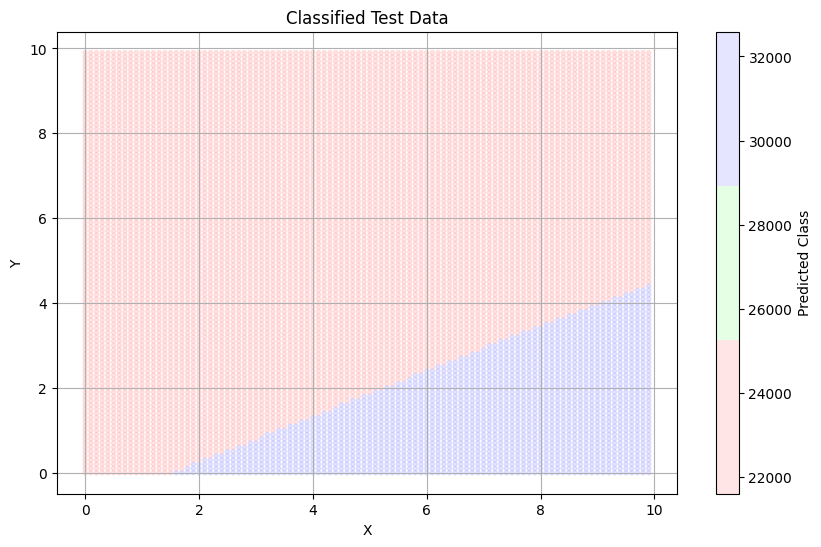

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate test data
x_values = np.arange(0, 10, 0.1)
y_values = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_data = np.c_[xx.ravel(), yy.ravel()]

# Classify test data using kNN classifier
predicted_classes = neigh_k3.predict(test_data)

# Create a scatter plot of the test data output
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) 
plt.scatter(xx.ravel(), yy.ravel(), c=predicted_classes, cmap=cmap_light, marker='.', alpha=0.3)
plt.title('Classified Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()


**A5**

C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature

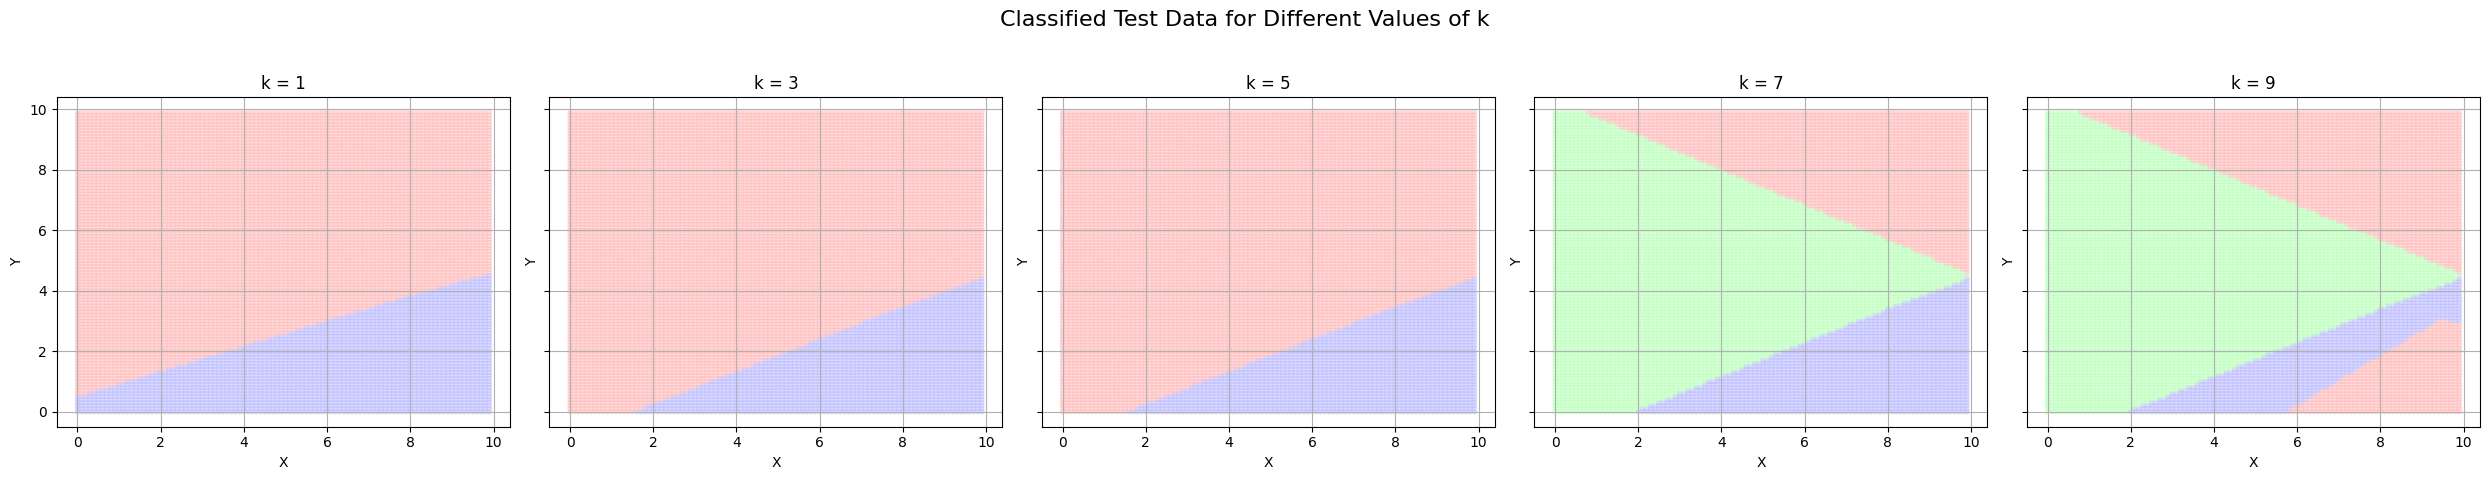

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
x_values = np.arange(0, 10, 0.1)
y_values = np.arange(0, 10, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_data = np.c_[xx.ravel(), yy.ravel()]

# Define a range of k values to test
k_values = [1, 3, 5, 7, 9]

# Initialize a colormap for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for class regions

# Create subplots for each value of k
fig, axs = plt.subplots(1, len(k_values), figsize=(len(k_values) * 5, 5), sharex=True, sharey=True)
for i, k in enumerate(k_values):
    # Initialize and train kNN classifier with current value of k
    neigh_k = KNeighborsClassifier(n_neighbors=k)
    neigh_k.fit(X_train, y_train)
    
    # Classify test data using current kNN classifier
    predicted_classes = neigh_k.predict(test_data)
    
    # Plot classified test data
    axs[i].scatter(xx.ravel(), yy.ravel(), c=predicted_classes, cmap=cmap_light, marker='.', alpha=0.3)
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].grid(True)

plt.suptitle('Classified Test Data for Different Values of k', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**A6**

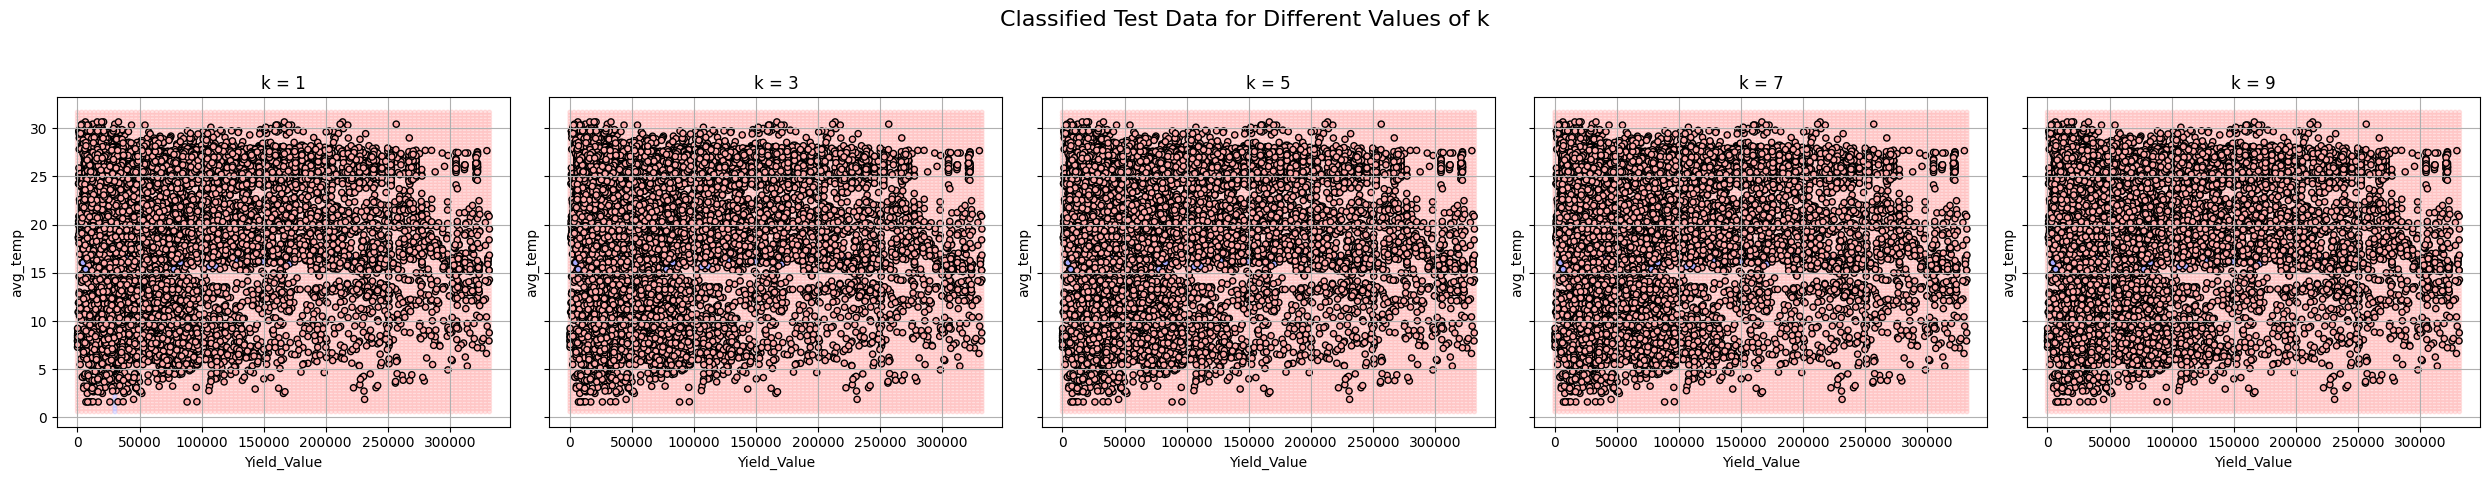

In [25]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Selecting features and classes from the dataframe
features = ['Yield_Value', 'avg_temp']
classes = ['Area_Albania', 'Area_Argentina']  # Example classes, choose as needed

# Extracting the selected features and classes
X = yield_final_no_outliers[features].values
y = yield_final_no_outliers[classes[0]].astype(int)  # Assuming binary classification, convert to int

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = [1, 3, 5, 7, 9]

# Generate test data
x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_values = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
xx, yy = np.meshgrid(x_values, y_values)
test_data = np.c_[xx.ravel(), yy.ravel()]

# Initialize a colormap for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for class regions

# Create subplots for each value of k
fig, axs = plt.subplots(1, len(k_values), figsize=(len(k_values) * 5, 5), sharex=True, sharey=True)
for i, k in enumerate(k_values):
    # Initialize and train kNN classifier with current value of k
    neigh_k = KNeighborsClassifier(n_neighbors=k)
    neigh_k.fit(X_train, y_train)
    
    # Classify test data using current kNN classifier
    predicted_classes = neigh_k.predict(test_data)
    
    # Plot classified test data
    axs[i].scatter(xx.ravel(), yy.ravel(), c=predicted_classes, cmap=cmap_light, marker='.', alpha=0.3)
    axs[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_light, edgecolor='k', s=20)
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel(features[0])
    axs[i].set_ylabel(features[1])
    axs[i].grid(True)

plt.suptitle('Classified Test Data for Different Values of k', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**A7**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Extracting features and target variable
X = yield_final_no_outliers[['avg_temp', 'Pesticides_Value']]
y = yield_final_no_outliers['Yield_Value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Defining the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Initializing the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, random_state=42)

# Fitting the RandomSearchCV to training data
random_search.fit(X_train, y_train)

# Getting the best parameters and best score
best_k = random_search.best_params_['n_neighbors']
best_score = random_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validation score: {best_score}")

# Getting the test score using the best parameters
test_score = random_search.score(X_test, y_test)
print(f"Test set score with best parameters: {test_score}")


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k value: 19
Best cross-validation score: 0.04541747555860841
Test set score with best parameters: 0.021397869557092133
